In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")

from model import Model, model_from_file
from model_plot import model_plot
from norms import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [48]:
def model_f(phi):
    return 4 * phi**3 - 3 * phi**4

delta = 0.001

def eps_old(phi):
    return 1 / (delta + model_f(phi))

def eps_u_old(x):
    return x / (delta + x)

def eps_new(phi, pwr):
    return 1 / delta + 1 - 1 / delta * eps_u(model_f(phi), pwr)

def eps_u(x, pwr):
    return 1 - (1 - delta) * (1 - x)**pwr + delta * (x - 1)

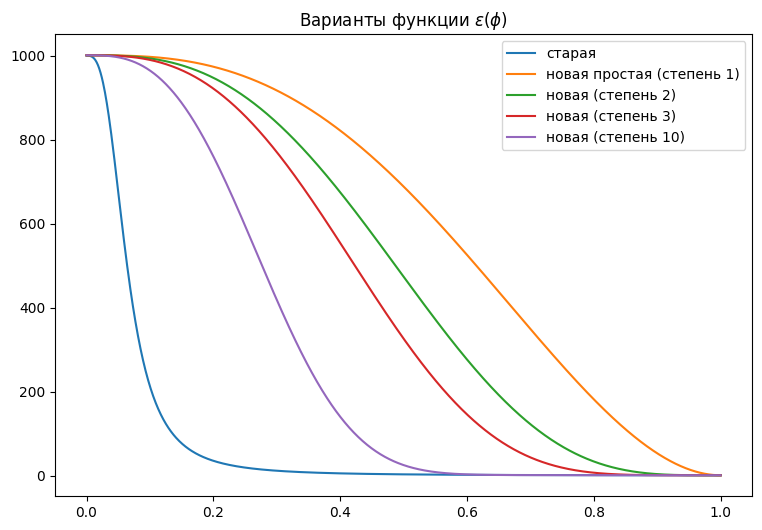

In [49]:
plt.figure(figsize=(9, 6))
plt.title(r'Варианты функции $\epsilon(\phi)$')
phi = np.linspace(0, 1, 1000)
plt.plot(phi, eps_old(phi))
plt.plot(phi, eps_new(phi, 1))
plt.plot(phi, eps_new(phi, 2))
plt.plot(phi, eps_new(phi, 3))
plt.plot(phi, eps_new(phi, 10))
plt.legend([
    'старая',
    'новая простая (степень 1)',
    'новая (степень 2)',
    'новая (степень 3)',
    'новая (степень 10)'
])
plt.show()

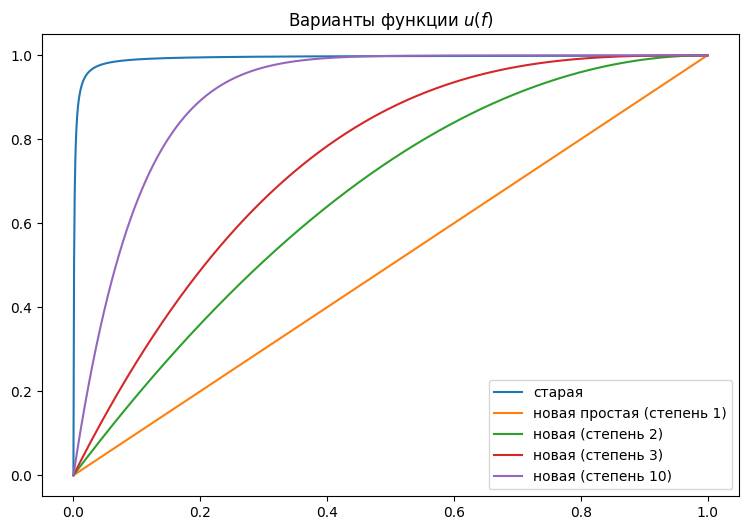

In [50]:
plt.figure(figsize=(9, 6))
plt.title(r'Варианты функции $u(f)$')
x = np.linspace(0, 1, 1000)
plt.plot(phi, eps_u_old(x))
plt.plot(phi, eps_u(x, 1))
plt.plot(phi, eps_u(x, 2))
plt.plot(phi, eps_u(x, 3))
plt.plot(phi, eps_u(x, 10))
plt.legend([
    'старая',
    'новая простая (степень 1)',
    'новая (степень 2)',
    'новая (степень 3)',
    'новая (степень 10)'
])
plt.show()

In [11]:
model_dir = '../../bin/'

In [31]:
model_old = model_from_file(model_dir + 'model_old.csv')

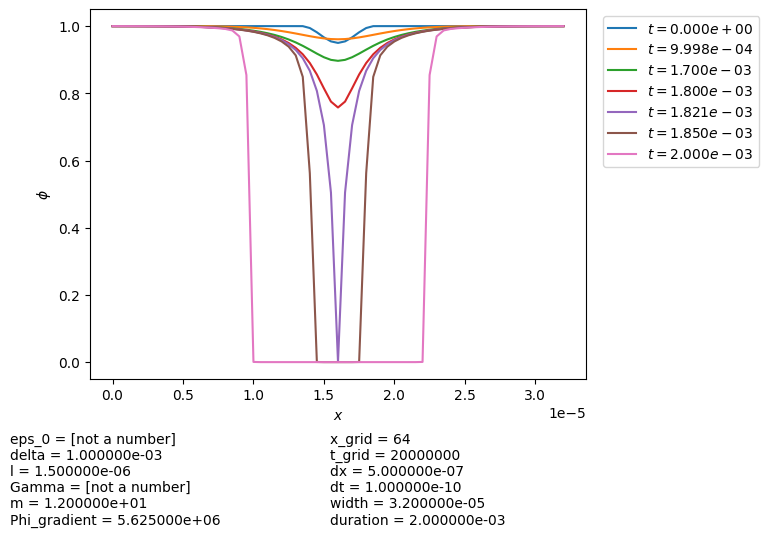

In [32]:
model_plot(model_old, [0, 1e-3, 1.7e-3, 1.8e-3, 1.821e-3, 1.85e-3, 2e-3])

In [33]:
model_new_2 = model_from_file(model_dir + 'model_new_2.csv')

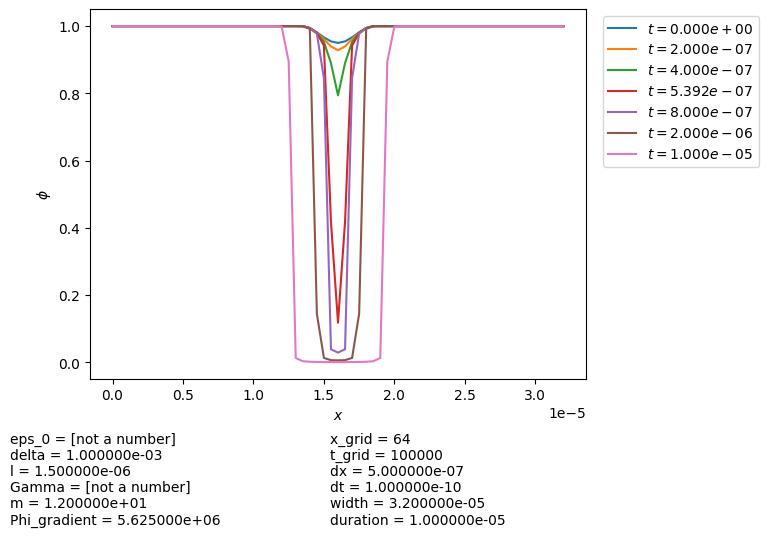

In [34]:
model_plot(model_new_2, [0, 2e-7, 4e-7, 5.4e-7, 8e-7, 2e-6, 1e-5])

In [38]:
model_new_1 = model_from_file(model_dir + 'model_new_1.csv')

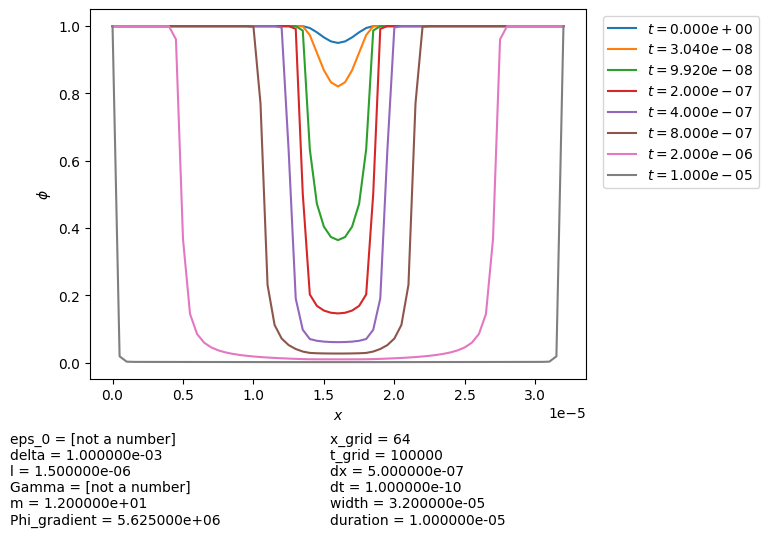

In [46]:
model_plot(model_new_1, [0, 3e-8, 1e-7, 2e-7, 4e-7, 8e-7, 2e-6, 1e-5])

In [51]:
model_new_3 = model_from_file(model_dir + 'model_new_3.csv')

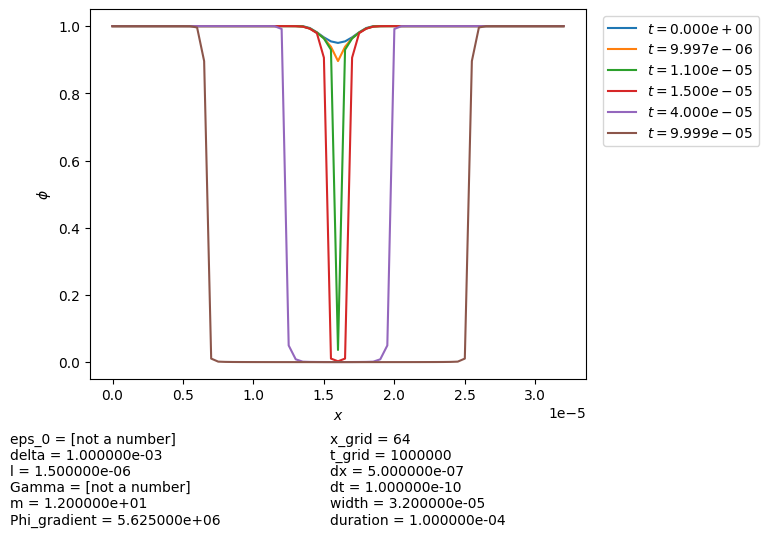

In [64]:
model_plot(model_new_3, [0, 1e-5, 1.1e-5, 1.5e-5, 4e-5, 1e-4])

## Падение точки

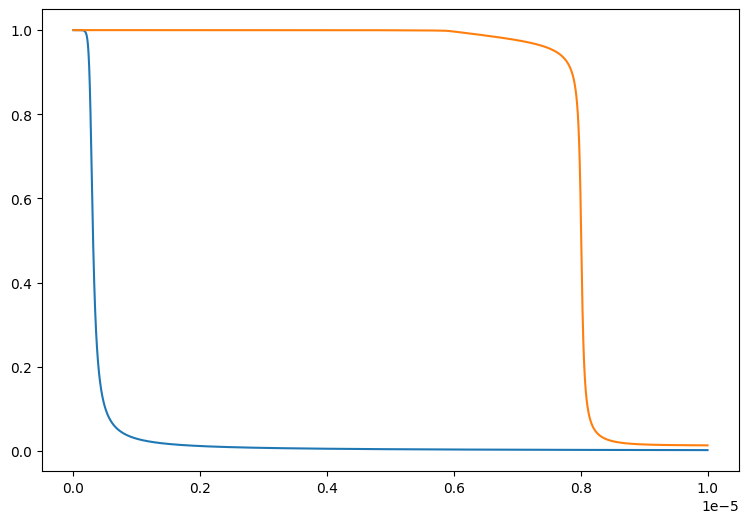

In [72]:
plt.figure(figsize=(9, 6))
plt.plot(model_new_1.ts, model_new_1.df_phi[26])
plt.plot(model_new_2.ts, model_new_2.df_phi[26])
plt.show()

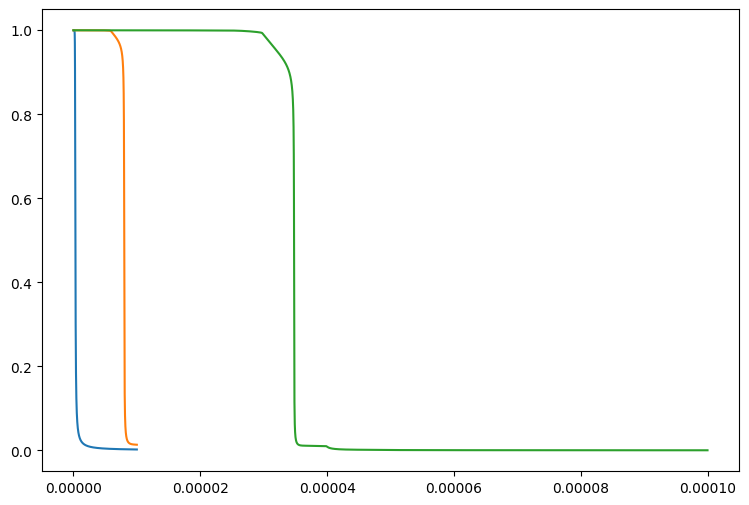

In [73]:
plt.figure(figsize=(9, 6))
plt.plot(model_new_1.ts, model_new_1.df_phi[26])
plt.plot(model_new_2.ts, model_new_2.df_phi[26])
plt.plot(model_new_3.ts, model_new_3.df_phi[26])
plt.show()

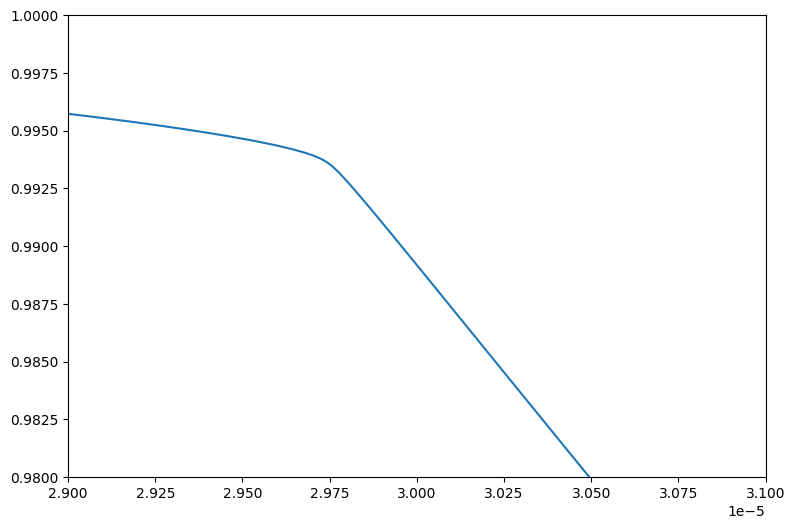

In [85]:
plt.figure(figsize=(9, 6))
plt.xlim([2.9e-5, 3.1e-5])
plt.ylim([0.98, 1])
plt.plot(model_new_3.ts, model_new_3.df_phi[26])
plt.show()